In [1]:
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
import useful_rdkit_utils as uru

sns.set(rc = {'figure.figsize':(15,8)})

In [5]:
fragment_lead_pairs = pd.read_csv('data/fragment_lead_pairs.csv')

In [6]:
fragment_lead_pairs

,Year,Table_Entry,Fragment,Lead
0,2022,1,Nc1cc(c[nH]c1=O)C(F)(F)F,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1
1,2022,2,CN1C[C@@H](O)[C@H](C1=O)c2ccc(C)cc2,COc1ccc(CN2C[C@H](O)[C@](CCC(C)C)(C2=O)c3ccc(c...
2,2022,3,Fc1cncc(c1)N2C(=O)N[C@@H](Cc3ccccc3)C2=O,Clc1ccccc1C2CC3(C2)NC(=O)N(C3=O)c4cncc5ccccc45
3,2022,4,c1ccc(cc1)c2ccccc2c3nnn[nH]3,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N
4,2022,5,CN(C)C(=O)C(N)Cc1ccc(F)cc1,Clc1ccc(cc1)[C@H]2CN[C@H](C2)C(=O)N3CCN(CC3)c4...
...,...,...,...,...
162,2016,23,CC1Cn2c(cc3cccc(S1)c23)C(=O)O,Cc1cc(OCCCc2c(C(=O)O)n3CCCc4c(Cl)ccc2c43)cc(C)...
163,2016,24,COC(=O)[C@@H](N)Cc1c[nH]c2ccccc12,Clc1sc(cc1Br)S(=O)(=O)NCCc2c[nH]c3ccccc23
164,2016,25,OC(=O)c1cc(c2ccccc2)n(n1)c3ccccc3,OC(=O)c1ccc(o1)c2ccc(Cl)c(c2)C(=S)NCc3ccc(cc3)...
165,2016,26,O=C(CN1CCNCC1)N2CCCCC2,COC[C@H]1CN[C@H](C)CN1CC(=O)N2CC(C)(C)c3cnc(Cc...


In [9]:
mol_smiles, lead_smiles = fragment_lead_pairs['Fragment'][1], fragment_lead_pairs['Lead'][1]

In [10]:
f = open("data/mol2mol.smi", "w")
f.write(mol_smiles)
f.close()

In [12]:
!reinvent sampling.toml --seed 42

15:11:17 <INFO> Started REINVENT 4.3.5 (C) AstraZeneca 2017, 2023 on 2024-07-01
15:11:17 <INFO> Command line: /home/fts_g_ucla_edu/.conda/envs/reinvent4/bin/reinvent sampling.toml --seed 42
15:11:17 <INFO> User fts_g_ucla_edu on host rips-relay-2024-vm
15:11:17 <INFO> Python version 3.10.14
15:11:17 <INFO> PyTorch version 2.2.1+cu121, git 6c8c5ad5eaf47a62fafbb4a2747198cbffbf1ff0
15:11:17 <INFO> PyTorch compiled with CUDA version 12.1
15:11:17 <INFO> RDKit version 2023.09.5
15:11:17 <INFO> Platform Linux-6.5.0-1018-gcp-x86_64-with-glibc2.35
15:11:17 <INFO> CUDA driver version 550.54.15
15:11:17 <INFO> Number of PyTorch CUDA devices 2
15:11:17 <WARN> 'use_cuda' is deprecated, use 'device' instead
15:11:18 <INFO> Using CUDA device:0 Tesla T4
15:11:18 <INFO> GPU memory: 14814 MiB free, 14917 MiB total
15:11:18 <INFO> Set seed for all random generators to None
15:11:18 <INFO> Writing JSON config file to /home/fts_g_ucla_edu/Projects/rips-relay/notebooks/_sampling.json
15:11:18 <INFO> Starti

In [13]:
analogs = pd.read_csv('sampling.csv')

In [14]:
analogs.head()

,SMILES,Input_SMILES,Tanimoto,NLL
0,CN1C[C@@H](O)[C@H](c2ccccc2)C1=O,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.600000,2.973137
1,CN1C[C@@H](O)[C@@H](c2ccccc2)C1=O,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.600000,3.316742
2,CN1C[C@H](O)[C@@H](c2ccccc2)C1=O,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.600000,3.421726
3,CN1C[C@@H](O)[C@H](c2cccc(Cl)c2)C1=O,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.576923,3.754017
4,COc1ccc([C@H]2C(=O)N(C)C[C@@H]2O)cc1OC,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.525424,3.949009


In [15]:
analogs['Tanimoto'].mean()

0.5785740335154668

In [16]:
print(lead_smiles in analogs['SMILES'].to_list())

False


In [17]:
ring_system_lookup = uru.RingSystemLookup.default()
analogs['ring_systems'] = analogs.SMILES.apply(ring_system_lookup.process_smiles)
analogs[['min_ring','min_freq']] = analogs.ring_systems.apply(uru.get_min_ring_frequency).to_list()
df = analogs.query('min_freq > 100').copy()
len(analogs), len(df)

(493, 481)

In [18]:
smiles = df['SMILES'].to_numpy()

mols = [Chem.MolFromSmiles(smile) for smile in smiles]

lead_mol = Chem.MolFromSmiles(lead_smiles)

In [22]:
fpgen = AllChem.GetMorganGenerator()

fingerprints = np.array([fpgen.GetFingerprint(mol).ToList() for mol in mols])

lead_fp = np.array([fpgen.GetFingerprint(lead_mol).ToList()])

X = np.vstack((fingerprints, lead_fp))

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

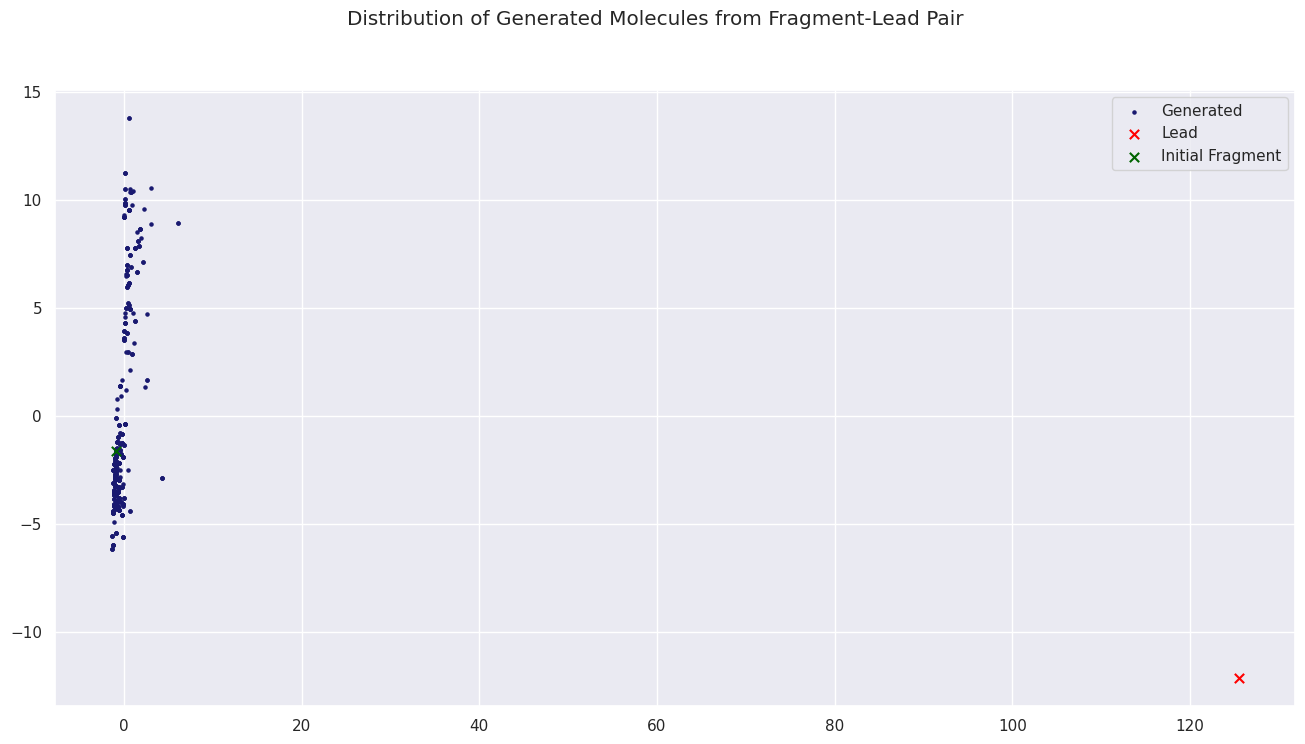

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))

ax.scatter(pca_fps.T[0][:-1], pca_fps.T[1][:-1], s=5, c='midnightblue', label='Generated')
ax.scatter(pca_fps.T[0][-1], pca_fps.T[1][-1], s=45, c='red', marker='x', label='Lead')
ax.scatter(pca_fps.T[0][1], pca_fps.T[1][1], s=45, c='darkgreen', marker='x', label='Initial Fragment')


ax.legend()

fig.suptitle('Distribution of Generated Molecules from Fragment-Lead Pair');

In [ ]:
fingerprints.shape

(482, 2048)